# CHAPTER 3.비지도 학습과 데이터 전처리

## 3.1 비지도 학습의 종류
+ 비지도 변환: 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘(ex 차원 축소)
+ 군집 알고리즘: 데이터를 비슷한 것끼리 그룹으로 묶는 것

## 3.2 비지도 학습의 도전 과제
+ 비지도 학습은 보통 레이블이 없는 데이터에 적용하기 때문에 알고리즘이 유용한 것을 학습했는지 평가
하는 것이 어려움
+ 비지도 학습은 지도 학습의 전처리 단계에서도 사용함
+ 비지도 학습의 결과로 새롭게 표현된 데이터를 사용해 학습하면 지도 학습의 정확도가 좋아지기도 하며
+ 메모리와 시간을 절약할 수 있음
스케일 조정 메서드는 비지도 방식임

In [1]:
# 실습하기 전 import문
import numpy as np
import pandas as pd
import mglearn
import sklearn
from IPython.display import display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
# 한글 Font
from matplotlib import rc
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
%matplotlib inline

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

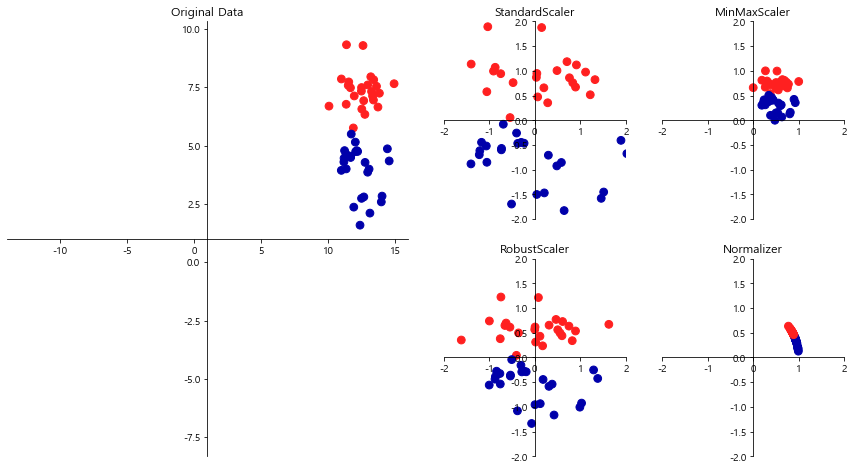

In [4]:
mglearn.plots.plot_scaling()

### 3.3.1 여러 가지 전처리 방법
+ 위의 첫 번 째 그래프는 두 개의 특성을 인위적으로 만든 이진 분류 데이터셋이다.
+ 오른쪽의 네 그래프는 데이터를 기준이 되는 범위로 변환하는 네 가지 방법  
  
+ StandardScaler: 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 함, 특성의 최
솟값과 최댓값 크기를 제한X
+ RobustScaler: 특성들이 같은 스케일을 같게 된다는 통계적 측면에서는 StandardScaler과 비슷, 중간값과
사분위 값을 사용, 이상치에 영향을 받지 않음
+ MinMaxScaler: 모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터 변경
+ Normalizer: 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정, 각 데이터 포인트가 다른
비율로 스케일이 조정, 특성 벡터의 길이는 상관없고 데이터의 방향만이 중요할 때 많이 사용

### 3.3.2 데이터 변환 적용하기

In [5]:
#cancer 데이터셋에 커널 SVM을 적용하고 데이터 전처리에는 MinMaxScaler를 사용
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

+ MinMaxScaler의 fit 메서드는 훈련 세트에 있는 특성마다 최솟값과 최댓값을 계산
+ fit 메서드를 호출할 때 훈련 데이터(X_train)만 넘겨주면 됨

In [9]:
scaler.fit(X_train)

MinMaxScaler()

+ fit 메서드로 학습한 변환을 적용하려면(훈련 데이터의 스케일을 조정하려면) transform 메서드 사용
+ scikit-learn 의 transform은 새로운 데이터 표현을 만들 때 사용하는 메서드

In [10]:
#데이터 변환
X_train_scaled = scaler.transform(X_train)
#스케일이 조정된 후 데이터셋의 속성을 출력합니다.
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [11]:
#테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
#스케일이 조정된 후 테스트 데이터의 속성을 출력합니다.
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


+ 스케일을 조정한 테스트 세트의 최솟값과 최댓값이 0과 1이 아닙니다.
+ 모든 스케일 모델은 항상 훈련 세트와 테스트 세트에 같은 변환을 적용해야 합니다.

### 3.3.3 (한국어판 부록) QuantileTransformer와 PowerTransformer
+ QuantileTransformer는 1,000개의 분위를 기본적으로 사용하여 데이터를 균등하게 분포시킴
+ RobustScaler와 비슷하게 이상치에 민감하지 않으며 전체 데이터를 0과 1사이로 압축

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

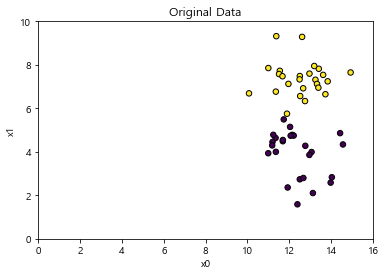

In [13]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

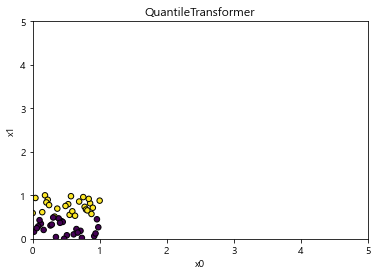

In [14]:
#QuantileTransformer를 적용해 어떻게 스케일이 변환되는지 확인
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

+ QuantileTransformer룰 적용하니 랜덤하게 흩어져 있던 데이터 포인트들이 두 특성의 0과 1 사이에 고르
게 분포되어 있습니다.
+ 변환된 데이터의 히스토그램을 그려보면 균등 분포를 쉽게 확인할 수 있습니다.

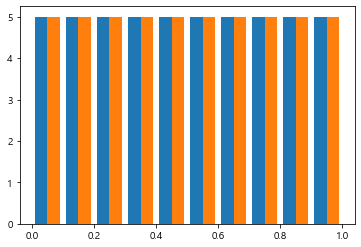

In [15]:
plt.hist(X_trans)
plt.show()

+ QuantileTransformer의 분위 수는 n_quantiles 매개변수에서 설정할 수 있음(기본값 1,000)
+ scaler 객체의 quantiles_ 속성에는 특성별로 계산된 분위 값이 들어 있으므로 이 속성의 크기는
(n_quantiles, n_features)

In [16]:
print(scaler.quantiles_.shape)

(50, 2)


+ np.percentile() 함수는 두 번째 매개변수에서 지정한 분위에 해당하는 샘플을 추출하여 반환

In [17]:
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]


In [19]:
#QuantileTrasformer로 변환 후 확인->결과) 예제 데이터가 분위와 동일한 값으로 변환되었다는 것을 알 수 있음
x_trans = QuantileTransformer(n_quantiles=5).fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[0.   0.25 0.5  0.75 1.  ]


+ QuantileTransformer는 output_distribution 매개변수에서 nomal로 지정하여 균등 분포가 아니라 정규분포
로 바꿀 수 있음

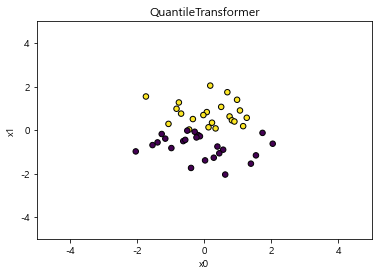

In [20]:
scaler = QuantileTransformer(n_quantiles=50, output_distribution='normal')
X_trans = scaler.fit_transform(X)
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

+ 데이터 특성별로 정규분포 형태에 가깝도록 변환해주는 PowerTransformer가 추가됨
+ PowerTransformer은 metod 매개변수에 'yeo-johnson'와 'box-cox' 알고리즘을 지정할 수 있음

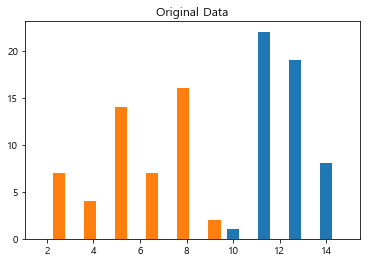

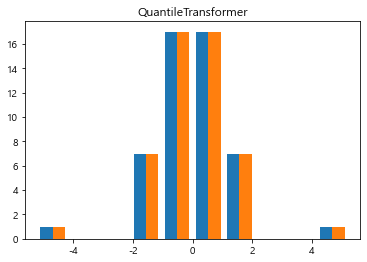

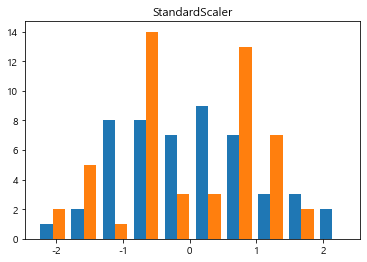

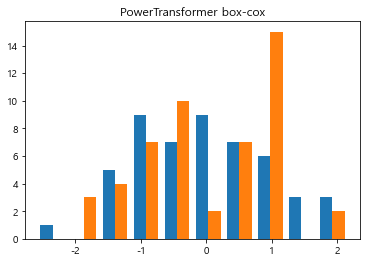

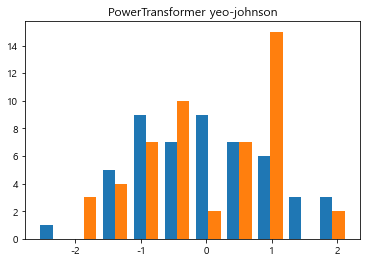

In [21]:
#QuantileTransformer와 StandardScaler, PowerTransformer의 두 알고리즘이 예제 데이터셋을 정규분포 로 변환하는 차이를 확인해보겠습니다.
plt.hist(X)
plt.title('Original Data')
plt.show()
X_trans = QuantileTransformer(n_quantiles=50, output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()
X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()
X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()
X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

+ 데이터셋마다 어떤 변환이 정규분포에 가깝게 변환할지 사전에 알기 어려우므로 히스토그램을 확인해보
는 것이 좋다

### 3.3.4 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기
+ 지도 학습 모델에서 테스트 세트를 사용하려면 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다는
점이 중요

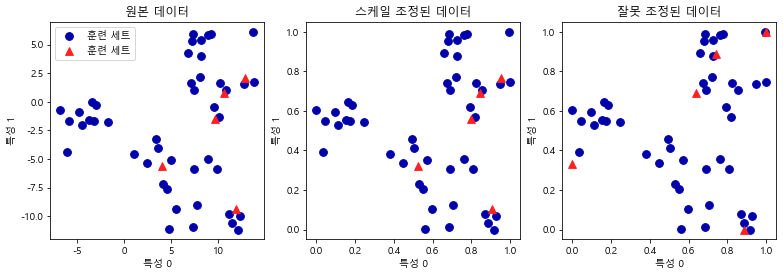

In [25]:
#테스트 세트의 최솟값과 범위를 사용 했을 때
from sklearn.datasets import make_blobs
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
X, _ = make_blobs(n_samples=50,centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
fig, axes = plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:,0],X_test[:,1], marker='^', c=mglearn.cm2.colors[1], label="훈련 세트",
s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1], marker='^',c=mglearn.cm2.colors[1], label
="훈련 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")
test_scaler= MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2.colors[0], label="trainingset", s=60)
axes[2].scatter(X_test_scaled_badly[:,0],X_test_scaled_badly[:,1], marker='^',c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")
for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

+ 단축 메서드와 효율적인 방법: fit_transform(훈련 세트 변환에 이 메서드를 사용하는 것은 좋은 습관임)

### 3.3.5 지도 학습에서 데이터 전처리 효과

In [26]:
#SVC를 학습시킬 때 MinMaxScaler의 효과를 확인해보겠습니다.
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.94


In [27]:
#SVC 모델을 학습시키기 전에 MinMaxScaler을 사용해 데이터의 스케일을 조정
#0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)
#스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도:.{:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도:.0.97


In [29]:
#모든 전처리 모델이 동일한 fit, transform 메서드을 제공하므로 사용하는 파이썬 클래스만 바꾸면 다른 전처리 알고리즘으로 손쉽게 교체가능
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)
#스케일 조정된 테스트 세트의 정확도
print("SVM test accuracy:.{:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy:.0.96


## 3.4 차원 축소, 특성 추출, 매니폴드 학습
+ 비지도 학습을 사용해 데이터를 변환하는 이유는 여러가지가 있다.
+ 가장 일반적인 동기는 시각화하거나, 데이터를 압축하거나, 추가적인 처리를 위해 정보가 더 잘 드러나는
표현을 찾기 위해서이다.

+ 차원 축소
  + 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것.
  + 일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소(sparse)
한 구조를 가지게 됨.
  + 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있음.
     + 4차원 이상일 경우 사람의 눈으로 볼 수 없기 때문에 데이터 특성 파악이 불가능해짐.
     + 이때, 3차원 이하의 차원 축소를 통해서 시각적으로 데이터를 압축해 표현 가능.
  + 차원 축소의 종류
     + 피처 선택(feature selection)
        + 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요
피처만 선택하는 것.
        + 장점: 선택한 변수 해석 용이
        + 단점: 변수간 상관관계 고려 어려움.
     + 피처 추출(feature extraction)
        + 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것.
        + 이때의 '압축'은 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매
핑해 추출하는 것을 의미.
        + 이렇게 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다
른 값이 됨.
        + 장점: 변수간 상관관계 고려, 일반적으로 변수의 개수를 많이 줄일 수 있음.
        + 단점: 추출된 변수의 해석이 어려움.
  + 차원 축소의 목적
        + 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소 추출.
  + 차원 축소의 대표적인 알고리즘
        + PCA,SVD,NMF
  + 차원 축소 알고리즘 사용되는 예
        + 매우 많은 픽셀로 이루어진 이미지 데이터
        + 텍스트 문서의 숨겨진 의미 추출하기.

### 3.4.1 주성분 분석(PCA)
+ 주성분 분석(PCA)는 특성들이 통계적으로 상관관계가 없어지도록 데이터셋을 회전시키는 기술.
+ 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택된다.
+ -> 많은 속성으로 구성된 원본 데이터를 그 핵심을 구성하는 데이터로 압축한 것.

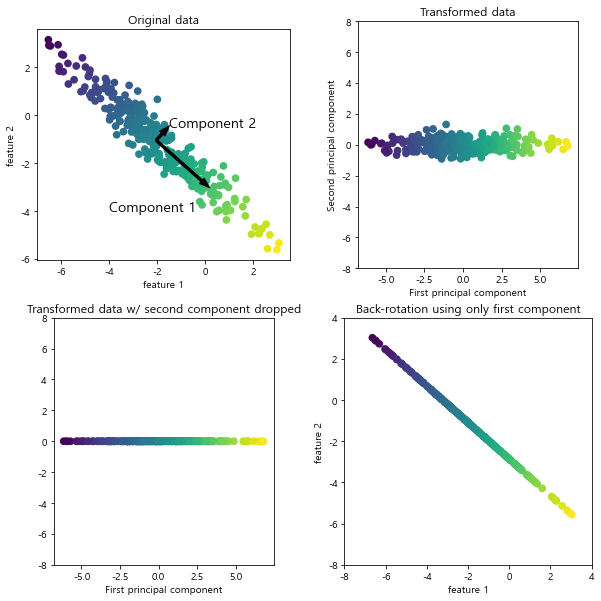

In [30]:
# In[14]:
mglearn.plots.plot_pca_illustration()

- In[14] 설명
+ 왼쪽 위 그래프
  + 원본 데이터 포인트를 색으로 구분해 표시한 것.
  + 분산(흩어진 정도)가 가장 큰 방향이 'Componenet 1'(성분 1).
  + 성분 1을 다른 말로, 특성들의 상관관계가 가장 큰 방향, 이 데이터에서 가장 많은 정보를 담고 있는
방향을 말한다.
  + 'Component 1'과 직각인 방향 중에서 가장 많은 정보를 담은 방향이 'Component 2'(성분 2).
  + 두 성분 다 화살표로 나타냈지만, 화살표의 머리와 꼬리는 아무런 의미가 없음.
  + 이런 가정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 해서 '주성분'이라고 한다.
  + 일반적으로 원본 특성 개수만큼의 주성분이 있음.
+ 오른쪽 위 그래프
  + 주성분 1과 2를 각각 x축과 y축에 나란하도록 회전한 것.
  + 그림을 보면, 회전하기 전에 데이터에서 평균을 빼서 중심을 원점에 맞춘 것을 알 수 있음.
  + PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행렬이 대각선 방향
을 제외하고는 0이 된다.
+ 왼쪽 아래 그래프
  + 첫 번째 주성분만 유지한 그래프.
  + 2차원 데이터셋이 1차원 데이터셋으로 차원이 감소함.
  + 가장 유용한 방향을 찾아서 그 방향의 성분, 즉 첫 번째 주성분을 유지하는 것.
+ 오른쪽 아래 그래프
  + 데이터에 다시 평균을 더하고 반대로 회전시킨 그래프.
  + 원래 특성 공간에 놓여 있지만 첫 번째 주성분의 정보만 담고 있다.
  + 이 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화하는 데 종종 사용한
다.

- PCA를 적용해 유방암 데이터셋 시각화하기

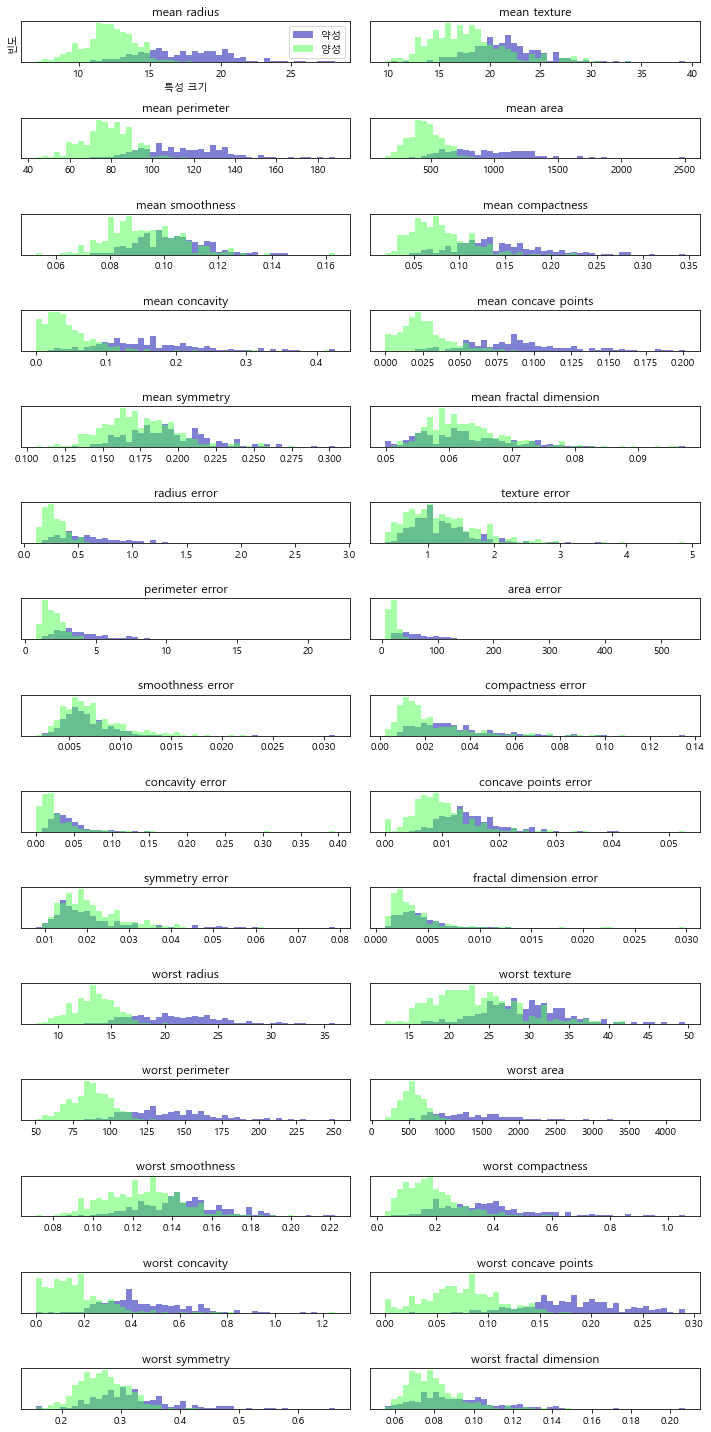

In [31]:
# In[15]:
# 양성과 악성 두 클래스에 대해 각 특성의 히스토그램을 그린 것.
# 유방암 데이터셋은 30개의 특성을 가지고 있음.
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# malignant는 악성/ benign 양성
fig,axes=plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]
ax = axes.ravel()
for i in range(0,30):
    _,bins =np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["약성","양성"],loc="best")
fig.tight_layout()

+ In[15] 설명
 + 특정 간격(bin이라고 부름)에 얼마나 많은 데이터 포인트가 나타나는지 횟수를 센 것.
 + 이 그래프를 통해 어떤 특성이 양성과 악성 샘플을 구분하는 데 더 좋은지 가늠해볼 수 있다.
    + ex) 'worst concave points'는 두 히스토그램이 확실히 구분되어 매우 유용한 특성.
 + 그러나 이 그래프는 특성 간의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지는 전혀 알려주
지 못한다.  
PCA를 사용하면 주요 상호작용을 찾아낼 수 있어 더 나은 그림을 그릴 수 있다.

In [33]:
#In[16]:
# PCA를 적용하기 전에 StandardScaler를 사용해 각 특성의 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정한다.
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

+ PCA 변환을 학습하고 적용하는 순서  
- 1. PCA객체 생성.  
- 2. fit 메서드를 호출해 주성분 찾기.  
- 3. transform 메서드를 호출해 데이터 회전  
4. 차원 축소.
+ 기본값일 때 PCA는 데이터를 회전(그리고 이동)만 시키고 모든 주성분을 유지한다.
+ 데이터의 차원을 줄이려면 PCA 객체를 만들 떄 얼마나 많은 성분을 유지할지 알려줘야 한다.

In [34]:
# In[17]:
from sklearn.decomposition import PCA
#데이터의 처음 두 개 주성분만 유지시킵니다.
pca = PCA(n_components=2)
#유방암 데이터로 PCA 모델을 만듭니다.
pca.fit(X_scaled)
#처음 두 개의 주성분을 사용해 데이터를 변환합니다.
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:",str(X_scaled.shape))
print("축소된 데이터 형태:",str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두 번째 주성분')

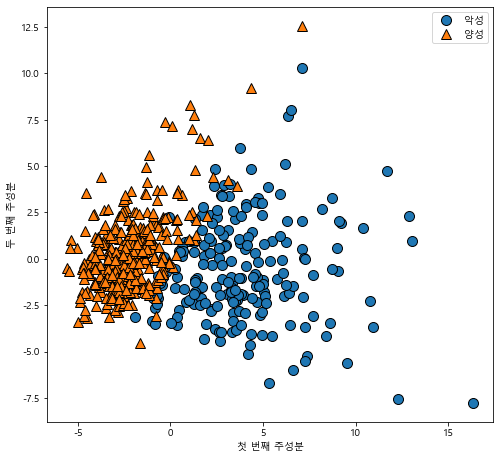

In [35]:
# In[18]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(["악성","양성"],loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [36]:
# In[19]:
print("PCA 주성분 형태:",pca.components_.shape)

PCA 주성분 형태: (2, 30)


In [37]:
# In[20]:
print("PCA 주성분:", pca.components_)

PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

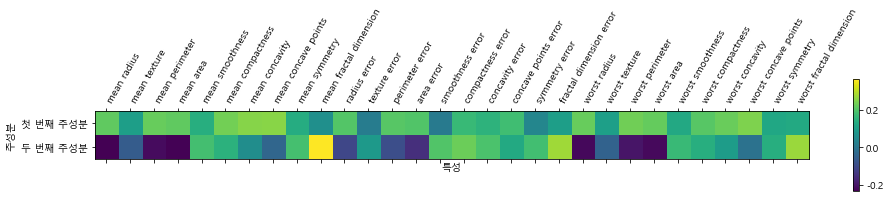

In [38]:
# In[21]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],["첫 번째 주성분","두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names,rotation=60,ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

##### 고유얼굴(eigenface)특성 추출
+ PCA는 특성 추출에 이용된다.
+ 특성 추출은 원본 데이터 표현보다 분석하기에 더 적합한 표현을 찾을 수 있으리란 생각에서 출발한 것.
+ 이미지를 다루는 애플리케이션은 특성 추출이 도움이 될만한 좋은 사례.
+ 이미지는 RGB의 강도가 기록된 픽셀로 구성되어 있음.

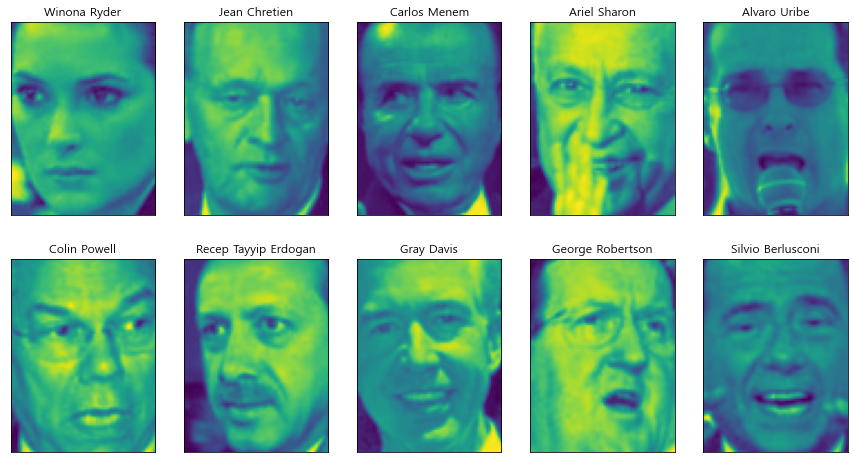

In [39]:
# In[22]:
# 처리 속도를 높이고자 흑백 이미지를 사용하고 스케일을 줄였다.
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [40]:
# In[24]:
print("people.images.shape:", people.images.shape)
print("클래스 개수:",len(people.target_names))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In[24] 설명
+ LFW 데이터셋에는 62명의 얼굴을 찍은 이미지가 총 3,023개가 있으며 각 이미지의크기는 87 X 65 픽셀이다.

In [41]:
# In[25]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count,name) in enumerate(zip(counts,people.target_names)):
    print("{0:25} {1:3}".format(name,count),end=' ')
    if (i+1)%3==0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In[25] 설명
+ 위의 결과를 보면, 데이터셋이 조지 부시(530)와 콜린 파월(236)에 편중된 것을 볼 수 있다.

In [43]:
# In[26]:
# 데이터셋의 편중을 없애기 위해 사람마다 50개의 이미지만 선택.
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
X_people=people.data[mask]
y_people=people.target[mask]
# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 같습니다.
X_peple = X_people/255.

얼굴 인식
+ 새로운 얼굴 이미지가 데이터베이스에 있는 기존 얼굴 중 하나에 속하는지 찾는 작업.  
ex) 사진 애플리케이션, 소셜 미디어, 보안 애플리케이션 등..
+ 가장 간단한 방법으로, 분류하려는 얼굴과 가장 비슷한 얼굴 이미지를 찾는 1-최근접 이웃 분류기를 사용
할 수 있다.
+ 이 분류기는 원칙적으로 클래스마다 하나의 훈련 샘플을 사용한다.

In [45]:
# In[27]:
from sklearn.neighbors import KNeighborsClassifier
# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train,X_test,y_train,y_test = train_test_split(X_people,y_people,stratify=y_people,random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test,y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


In[27]:
+ KNeighborsClassifier를 이용하여 얼굴 분류.  
정확도 23%로, 4번에 한 번 꼴로 올바르게 인식함. 따라서, 좋은 결과라고 할 수 없다.
+ 픽셀을 있는 그대로 비교하는 방식으로는 얼굴의 특징을 잡아내기 어렵다.  
예를 들어, 픽셀을 비교할 때 얼굴 위치가 한 픽셀만 오른쪽으로 이동해도 큰 차이를 만들어 완전히 다른 얼굴로 인식하게 된다.
+ PCA의 화이트닝 옵션 사용  
주성분의 스케일이 같아지도록 조정하는 것.  
이는 StandardScaler를 적용하는 것과 동일 (각 특성의 분산이 1이 되도록 하는 것.)

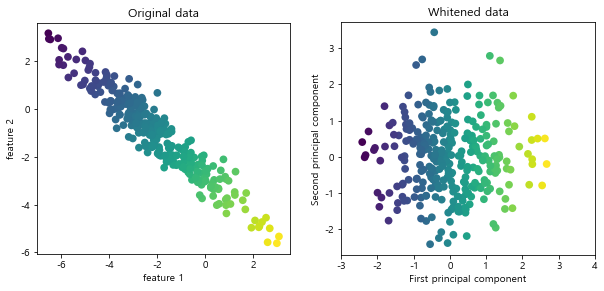

In [46]:
# In[28]:
# 화이트닝 옵션으로 데이터가 회전하는 것뿐만 아니라 스케일도 조정되어 그래프가 원 모양으로 바뀜.
mglearn.plots.plot_pca_whitening()

In [47]:
# In[29]:
# PCA 객체를 훈련 데이터(X_train)로 학습시켜 처음 100개의 주성분을 추출함.
pca = PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
# 훈련 데이터와 테스트 데이터를 변환한다.
# X_train_pca는 처음 100개의 주성분에 해당하는 특성을 가진다.
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (1547, 100)


In [48]:
# In[30]:
# 최근접 이웃 분류기로 이미지 분류해보기.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca,y_test)))

테스트 세트 정확도: 0.31


In[31] & In[32]
+ 계산한 주성분 시각화해보기.
  + 주성분이 나타내는 것은 입력 데이터 공간에서의 어떤 방향이라는 것 기억하기!
  + 따라서, 입력 차원이 8765픽셀의 흑백 이미지이므로 이 공간의 어떤 방향도 8765픽셀의 흑백 이미지
이다.
+ 주성분들을 완전하게 이해하는 것은 불가능. 짐작은 해볼 수 있다.
+ PCA 모델은 픽셀을 기반으로 하므로, 얼굴의 배치와 조명이 두 이미지가 얼마나 비슷한지 판단하는 데 큰
영향을 준다.  
사람이 평가하는 방식과는 다르다.

pca.components_.shape: (100, 5655)


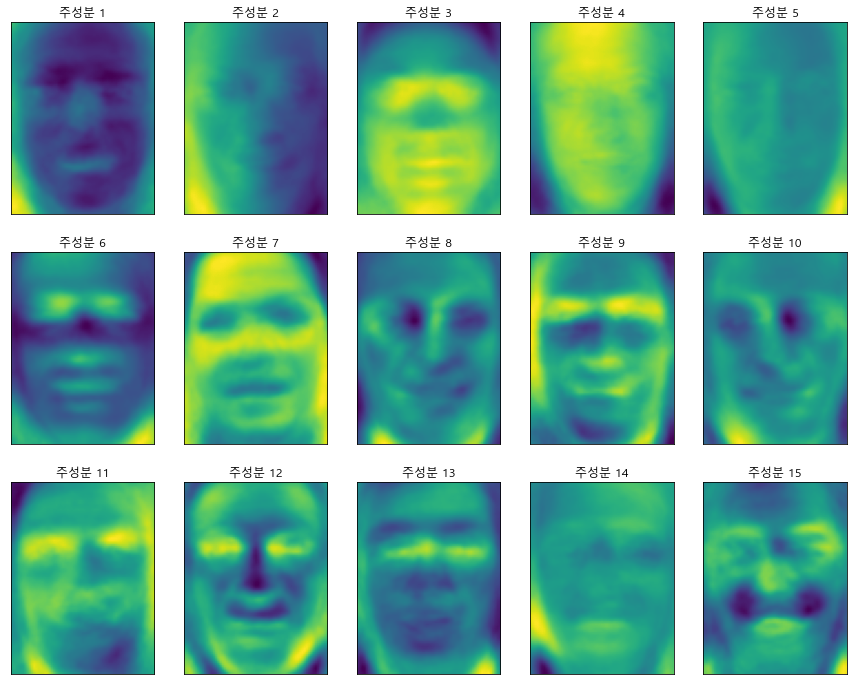

In [50]:
# In[31] & In[32]:
print("pca.components_.shape:",pca.components_.shape)
fig,axes=plt.subplots(3,5,figsize=(15,12),
subplot_kw={'xticks':(),'yticks':()})
for i,(component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("주성분 {}".format((i+1)))

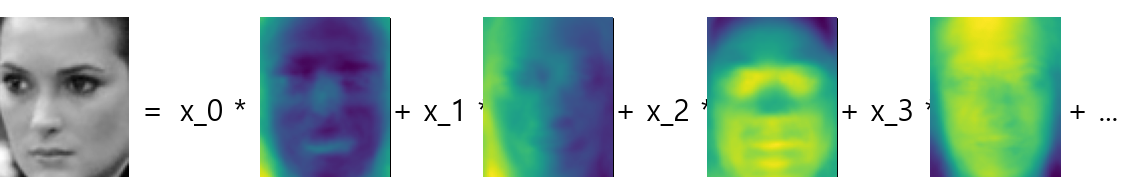

In [52]:
# In[33]:
# 그림 3-10
# 이미지를 주성분의 가중치 합으로 분해한 PCA 구성도
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()
imagebox = OffsetImage(people.images[0], zoom=2, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)
for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=2, cmap="viridis")
    ab = AnnotationBbox(imagebox, (.285 + .2 * i, 0.4),
    pad=0.0, xycoords='data')
    ax.add_artist(ab)
    if i == 0:
        plt.text(.155, .3, 'x_{} *'.format(i), fontdict={'fontsize': 30})
    else:
        plt.text(.145 + .2 * i, .3, '+ x_{} *'.format(i), fontdict={'fontsize': 30})
plt.text(.95, .3, '+ ...', fontdict={'fontsize': 30})
plt.rc('text')
plt.text(.12, .3, '=', fontdict={'fontsize': 30})
plt.axis("off")
plt.show()
plt.close()
plt.rc('text')

In[33] 설명
+ x_0,x_1은 데이터 포인트에 대한 주성분의 계수이다. 이미지가 회전된 공간에 적용된 값.

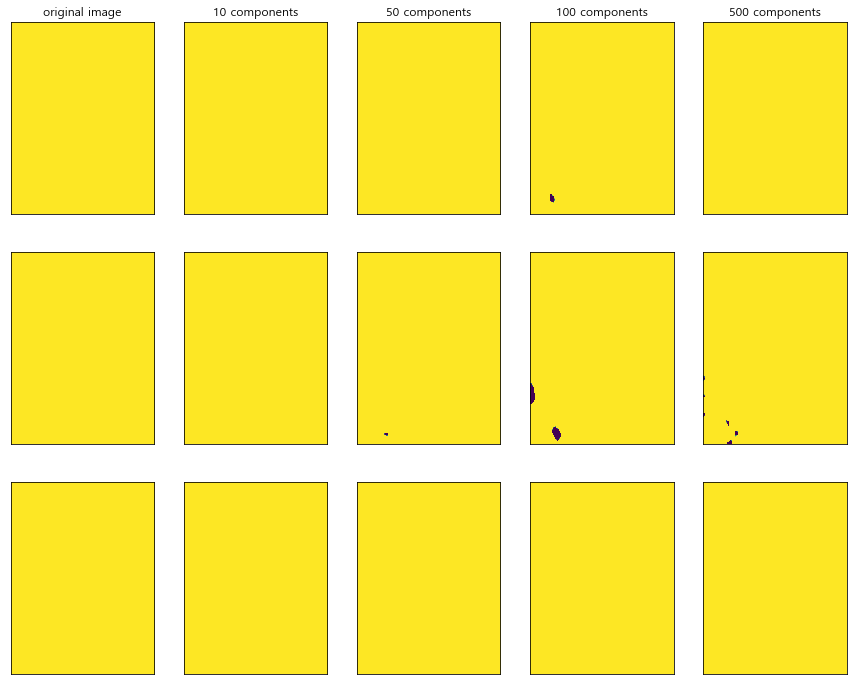

In [53]:
# In[34]:
# 주성분 개수에 따른 세 얼굴 이미지의 재구성
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

# 위의 코드 오류...

In[35] 설명
+ 10개만 사용했을 때 -> 얼굴의 각도, 조명 같은 이미지의 기본 요소만 나타남.
+ 주성분을 더 많이 사용할수록 이미지가 더욱 상세해진다.
+ 주성분을 픽셀 수만큼 사용하면 변환 후에 어떤 정보도 잃지 않게 되므로 이미지를 완벽하게 구성할 수 있
다.

Text(0, 0.5, '두 번째 주성분')

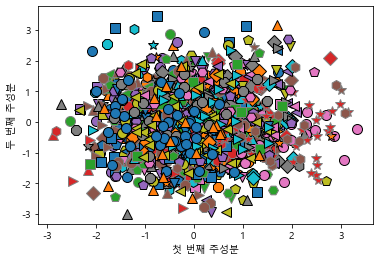

In [55]:
# In[35] :
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train)
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In[35] 설명
+ 처음 두 개의 주성분을 이용하여 만든 얼굴 데이터셋의 산점도
+ 전체데이터가 한 덩어리로 뭉쳐 있어 클래스가 잘 구분되지 않는다.

### 3.4.2 비음수 행렬 분해(NMF)  
유용한 특성을 뽑아내기 위한 또 다른 비지도 학습 알고리즘
+ PCA와 비슷하고, 차원 축소에도 사용
+ 음수가 아닌 성분과 계수 값을 찾는다
+ 음수가 아닌 특성을 가진 데이터에만 적용
+ 인위적 데이터에 NMF 적용하기  
NMF로 데이터를 다루려면 주어진 데이터가 양수인지 확인!  
+ ln[1]은 2차원 예제 데이터에 NMF를 적용한 결과
+ PCA와는 반대로 성분 개수를 줄이면 특정 방향이 제거되는 것뿐만 아니라 전체 성분이 완전히 바뀜  
모든 성분을 동등하게 취급('첫번째의 비음수 성분' 같은 것은 없음)

C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


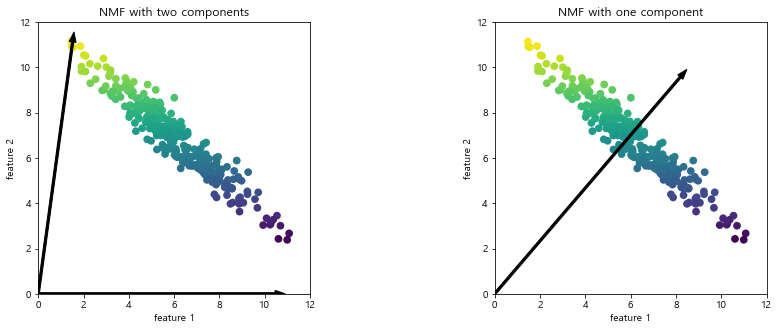

In [57]:
import mglearn
mglearn.plots.plot_nmf_illustration()

얼굴 이미지에 NMF 적용하기  
앞서 사용한 LFW 데이터셋에 적용, 핵심 매개변수는 추출할 성분의 개수

In [61]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.
# 테스트/훈련세트 나누기
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
image_shape = people.images[0].shape

PCA를 사용했을 때와 비슷하지만 품질이 조금 떨어짐  
PCA는 재구정 측면에서 최선의 방향을 찾음, NMF는 데이터 인코딩 또는 데이터에 있는 유용한 패턴을 찾는
데 활용

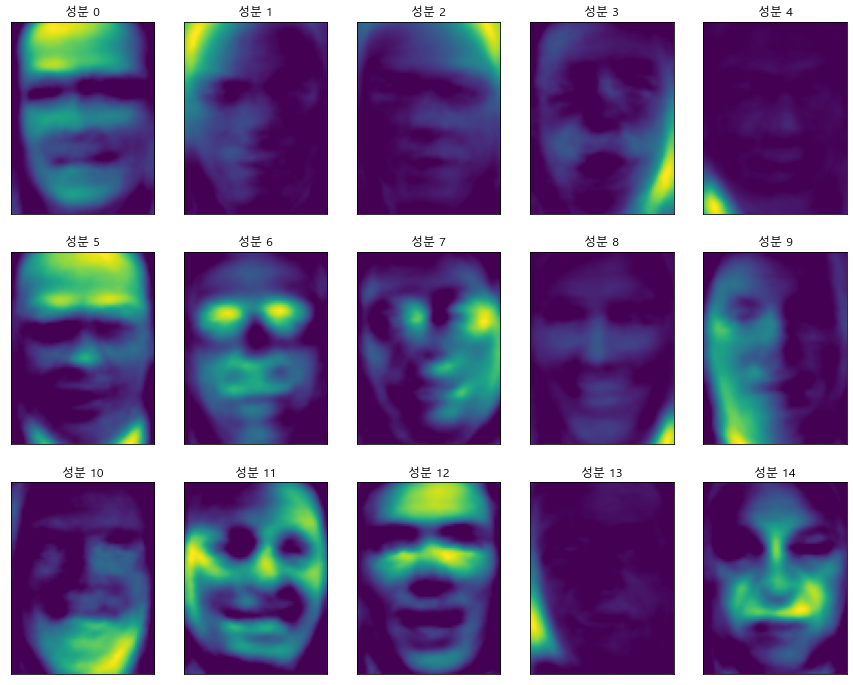

In [63]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

+ 성분 15개를 추출

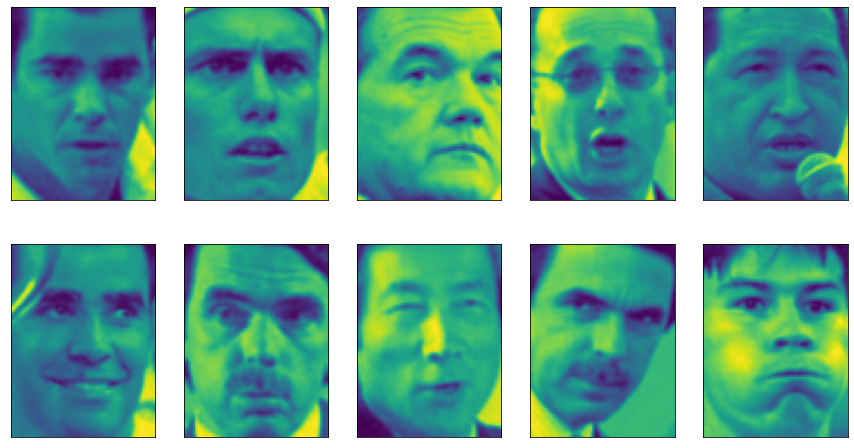

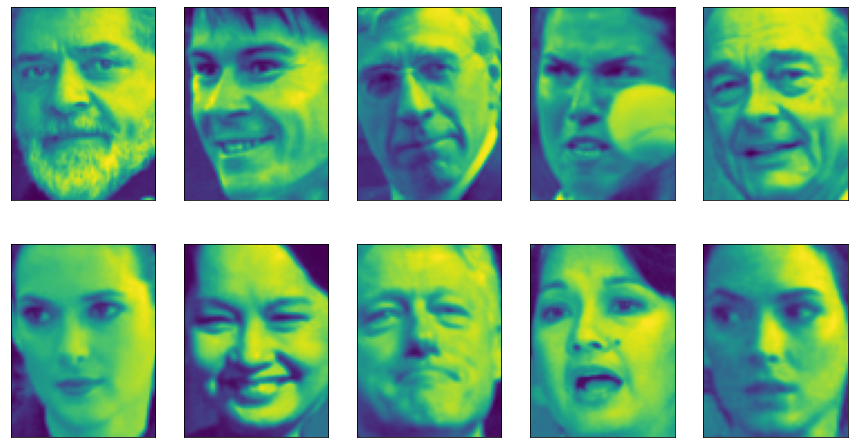

In [64]:
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

이와 같이 NMF은 데이터에 있는 유용한 패턴을 찾는데 활용, 소리,유전자 표현, 텍스트 데이터처럼 덧붙이는
구조를 가진 데이터에 적합

세 개의 서로 다른 입력으로부터 합성된 신호를 분해해서 원본 신호를 복원(NMF와 PCA 사용)

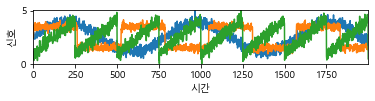

In [67]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("시간")
plt.ylabel("신호")
plt.margins(0)

In [68]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만듭니다
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태:", X.shape)

측정 데이터 형태: (2000, 100)


In [69]:
nmf = NMF(n_components=3, random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태:", S_.shape)

복원한 신호 데이터 형태: (2000, 3)


In [70]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

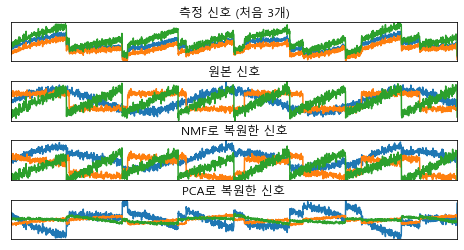

In [71]:
models = [X, S, S_, H]
names = ['측정 신호 (처음 3개)',
'원본 신호',
'NMF로 복원한 신호',
'PCA로 복원한 신호']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
    ax.margins(0)

위의 그래프에서 볼 수 있듯이 NMF는 원본 신호를 잘 복원했지만 PCA는 실패  
NMF로 생성한 성분은 순서가 없음(이 예에서는 NMF 성분의 순서가 원본신호와 같지만, 순전히 우연)

### 3.4.3 t-SNE를 이용한 매니폴드 학습  
시각화 알고리즘으로 훨씬 복잡한 매핑을 만들어 더 나은 시각화를 제공, t-SNE 알고리즘을 많이 사용
+ 테스트 세트에는 적용할 수 없고, 단지 훈련했던 데이터만 변환
+ 탐색적 데이터 분석에 유용하지만 지도 학습용으로는 거의 사용하지 않는다.
+ t-SNE의 아이디어는 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것
+ 멀리 떨어진 포인트와 거리를 보존하는 것보다 가까이 있는 포인트에 더 많은 비중을 둠, 즉 이웃 데이터 포인트에 대한 정보를 보존하려고 노력

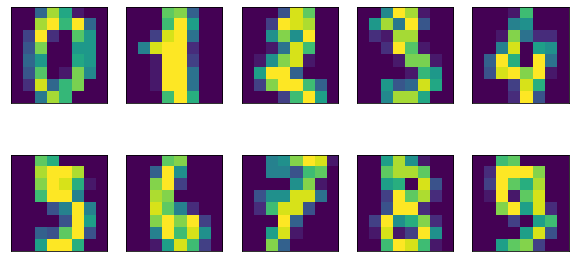

In [73]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

PCA를 사용해 데이터를 2차원으로 축소해 시각화

Text(0, 0.5, '두 번째 주성분')

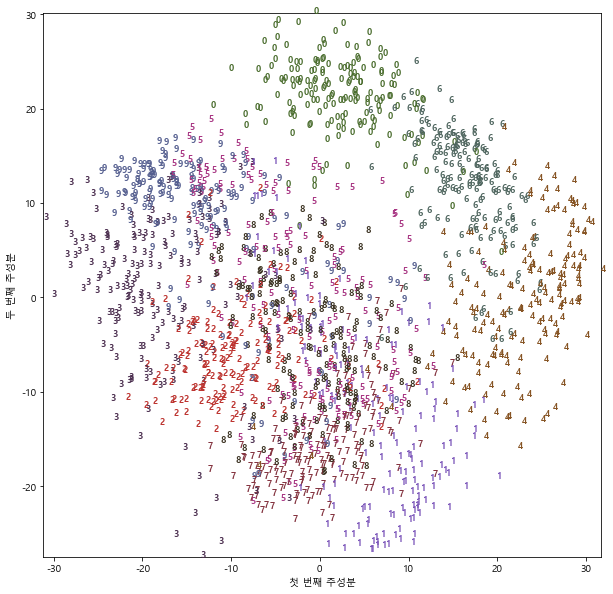

In [74]:
# PCA 모델을 생성합니다
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
# 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

같은 데이터셋에 t-SNE를 적용  
새 데이터를 변환하는 기능을 제공하지 않으므로 TSNE 모델에는 transform 메서드가 없음

In [76]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에는 transform 메소드가 없으므로 대신 fit_transform을 사용합니다
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE 특성 1')

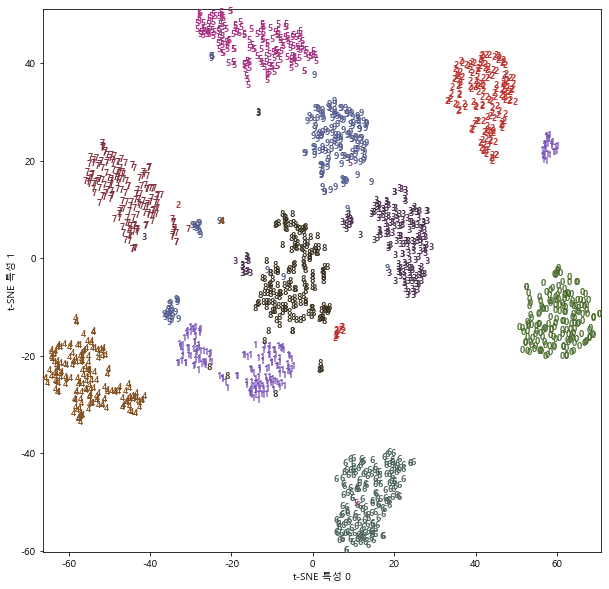

In [78]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
# 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

모든 클래스가 확실히 잘 구분  
클래스 레이블 정보를 사용하지 않으므로 완전한 비지도 학습

## 3.5 군집
+ 군집 : 데이터셋을 클러스터라는 그룹으로 나누는 작업
+ 한 클러스터 안의 데이터 포인트끼리는 매우 비슷하고 다른 클러스터의 데이터 포인트와는 구분되도록
데이터를 나누는 것이 목표
+ 분류 알고리즘과 비슷하게 군집 알고리즘은 각 데이터 포인트가 어느 클러스터에 속하는지 할당(또는 예
측)함

### 3.5.1 K-평균 군집
+ 가장 간단하고 널리 사용되는 군집 알고리즘
+ 다음과 같은 과정으로 진행됨
+ 다음 그림은 예시용 데이터셋에 k-평균 군집을 적용한 예임 (삼각형은 클러스터 중심, 원은 데이터 포인
트)

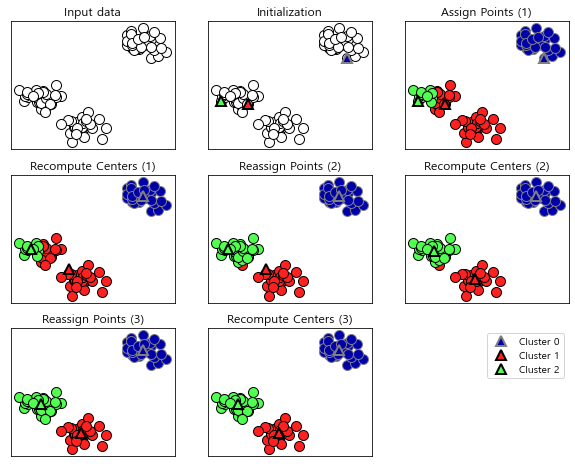

In [79]:
mglearn.plots.plot_kmeans_algorithm()

새로운 데이터 포인트가 주어지면 k-평균 알고리즘은 가장 가까운 클러스터 중심을 할당함  
다음은 학습시킨 클러스터 중심의 경계임

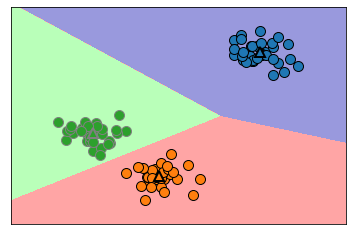

In [80]:
mglearn.plots.plot_kmeans_boundaries()

앞에서 사용한 인위적 데이터셋에 적용해보자

In [81]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# 인위적으로 2차원 데이터를 생성합니다
X, y = make_blobs(random_state=1)
# 군집 모델을 만듭니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

+ 알고리즘을 적용하면 X에 담긴 각 훈련 데이터 포인트에 클러스터 레이블이 할당됨
+ 다음 코드와 같이 kmeans.label_ 속성에서 이 레이블을 확인할 수 있음

In [82]:
print(kmeans.labels_)

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


+ predict 메서드를 사용해 새로운 데이터의 클러스터 레이블을 예측할 수 있음
+ 예측은 각 포인트에 가장 가까운 클러스터 중심을 할당하는 것이며 기존 모델을 변경하지 않음
+ 다음 코드와 같이 훈련 세트에 대해 predict 메서드를 실행하면 labels_와 같은 결과를 얻게 됨

In [83]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


+ 군집은 각 데이터 포인트가 레이블을 가진다는 면에서 분류와 조금 비슷해 보이나 정답을 모르고 있으며 레이블 자체에 어떤 의미가 있지는 않음
+ 초기화를 무작위로 해서 알고리즘을 다시 실행하면 클러스터의 번호가 다르게 부여될 수 있기 때문에 2차원 예제 데이터에서 군집 알고리즘을 적용할 때 한 그룹의 레이블은 0으로, 다른 그룹은 1로 지정되는 것은 중요하지 않음

+ 다음 코드는 이 데이터의 그래프를 다시 그려보는 것임
+ cluster_centers_속성에 저장된 클러스터 중심을 삼각형으로 표시함

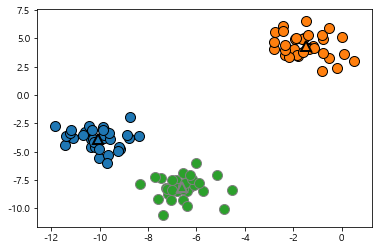

In [84]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)

+ 다음 코드는 클러스터 수를 늘리거나 줄이는 것

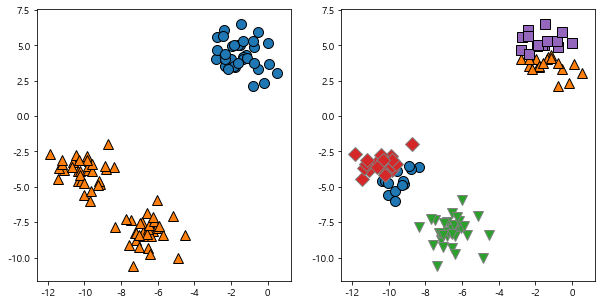

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# 두 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

K-평균 알고리즘이 실패하는 경우
+ 데이터셋의 클러스터 개수를 정확하게 알고 있더라도 k-평균 알고리즘이 항상 이를 구분해낼수 있는 것은 아님
+ 각 클러스터를 정의하는 것이 중심 하나뿐이므로 클러스터는 둥근 형태로 나타나기 때문에 k-평균 알고리즘은 비교적 간단한 형태를 구분할 수 있음
+ k-평균은 모든 클러스터의 반경이 똑같다고 가정하기 때문에 클러스터 중심 사이의 정확히 중간에 경계를 그림
+ 그런데 이는 가끔 밑에 그림처럼 예상치 않은 결과를 만듦

Text(0, 0.5, '특성 1')

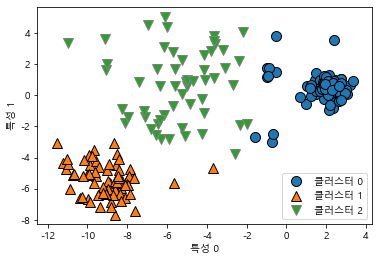

In [86]:
X_varied, y_varied = make_blobs(n_samples=200,
cluster_std=[1.0, 2.5, 0.5],
random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

+ 위에 경우는 클러스터의 밀도가 다를 때 k-평균으로 찾은 클러스터 할당의 결과임
+ 클러스터 0과 클러스터 1은 클러스터 중심에서 멀리 떨어진 포인트들도 포함하고 있음

+ k-평균은 또 클러스터에서 모든 방향이 똑같이 중요하다고 가정
+ 따라서 k-평균알고리즘은 밑에 그림과 같이 원형이 아닌 클러스터를 구분하지 못함

Text(0, 0.5, '특성 1')

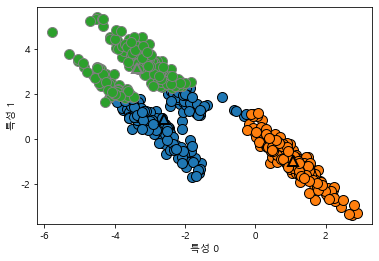

In [87]:
# 무작위로 클러스터 데이터 생성합니다
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# 데이터가 길게 늘어지도록 변경합니다
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# 클러스터 할당과 클러스터 중심을 나타냅니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

+ 더 복잡한 형태의 데이터라면 k-평균은 다음 그림과 같이 성능이 더 나빠짐

Text(0, 0.5, '특성 1')

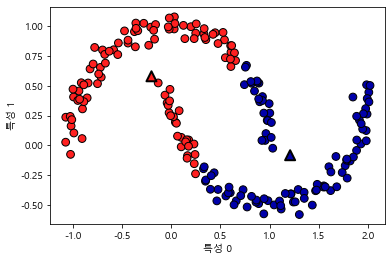

In [88]:
# two_moons 데이터를 생성합니다(이번에는 노이즈를 조금만 넣습니다)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

벡터 양자화 또는 분해 메서드로서의 k-평균
+ k-평균은 클러스터 중심으로 각 데이터를 표현하므로 이를 각 데이터 포인트가 클러스터 중심, 즉 하나의 성분으로 표현된다고 볼 수 있음
+ k-평균을 이렇게 각 포인트가 하나의 성분으로 분해되는 관점으로 보는 것을 벡터 양자화라고 함
+ PCA, NMF, k-평균에서 추출한 성분과 100개의 성분으로 테스트 세트의 얼굴을 재구성한 것을 나란히 비교해보자
+ k-평균의 경우 재구성은 훈련 세트에서 찾은 가장 가까운 클러스터의 중심임

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
X_people, y_people, stratify=y_people, random_state=42)
nmf = NMF(n_components=100, max_iter=1000, tol=1e-2, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

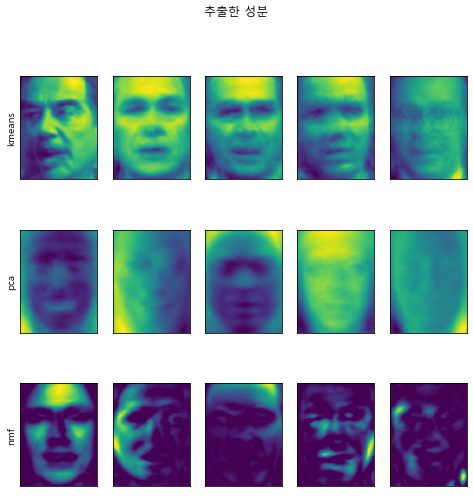

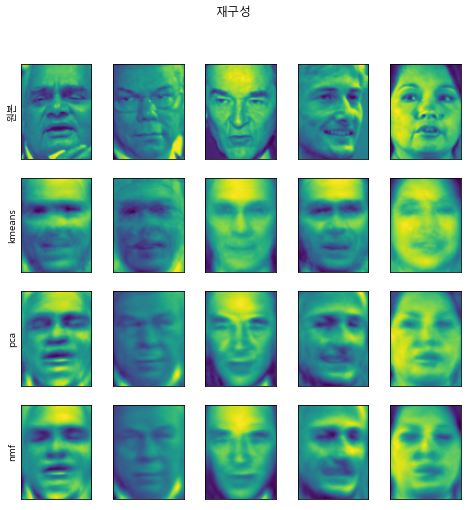

In [90]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("추출한 성분")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
fig.suptitle("재구성")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("원본")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

k-평균을 사용한 벡터 양자화의 흥미로운 면은 입력 데이터의 차원보다 더 많은 클러스터를 사용해 데이
터를 인코딩할 수 있다는 점임

클러스터 레이블:
 [4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


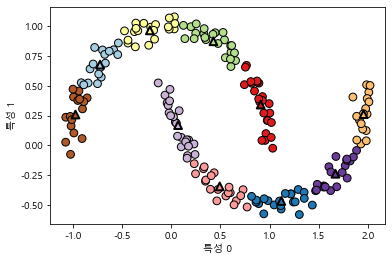

In [92]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired', edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("클러스터 레이블:\n", y_pred)

+ 위 코드는 10개의 클러스터를 사용했기 때문에 데이터를 10개의 성분(즉 10개의 특성)으로 표현한 것으로 볼 수 있음
+ 포인트가 속한 클러스터에 해당하는 특성을 제외한 다른 특성은 모두 0이라고 생각할 수 있음

+ 클러스터 중심까지의 거리를 특성으로 사용하면 데이터를 더욱 잘 나타낼 수 있음
+ 이 데이터는 밑에 코드처럼 kmeans 모델의 transform 메서드를 사용하여 구할 수 있음

In [93]:
distance_features = kmeans.transform(X)
print("클러스터 거리 데이터의 형태:", distance_features.shape)
print("클러스터 거리:\n", distance_features)

클러스터 거리 데이터의 형태: (200, 10)
클러스터 거리:
 [[1.54731274 1.03376805 0.52485524 ... 1.14060718 1.12484411 1.80791793]
 [2.56907679 0.50806038 1.72923085 ... 0.149581   2.27569325 2.66814112]
 [0.80949799 1.35912551 0.7503402  ... 1.76451208 0.71910707 0.95077955]
 ...
 [1.12985081 1.04864197 0.91717872 ... 1.50934512 1.04915948 1.17816482]
 [0.90881164 1.77871545 0.33200664 ... 1.98349977 0.34346911 1.32756232]
 [2.51141196 0.55940949 1.62142259 ... 0.04819401 2.189235   2.63792601]]


k-평균의 장점
+ 비교적 이해와 구현이 쉽고 빠름
+ (scikit-learn은 아주 큰 대규모 데이터셋을 처리할 수 있는 MiniBatchKMeans도 제공함)

k-평균의 단점
+ 무작위 초기화를 사용하여 알고리즘의 출력이 난수 초깃값에 따라 달라짐
+ 클러스터의 모양을 가정하고 있어서 활용 범위가 비교적 제한적이고, 찾으려 하는 클러스터의 개수를 지정해야만 함 (실제 애플리케이션에서는 알 수 없을 것)

### 3.5.2 병합 군집
+ '병합군집'이란 다음과 같은 원리로 만들어진 군집 알고리즘의 모음  
시작할 때 각 포인트를 하나의 클러스터로 지정하고, 그다음 어떤 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐나감  
scikit-learn에서 사용하는 종료 조건은 클러스터 개수로, 지정된 개수의 클러스터가 남을 때까지 비슷한 클러스터를 합침  
linkage 옵션에서 가장 비슷한 클러스터를 측정하는 방법을 지정하고 이 측정은 항상 두 클러스터 사이에서 이루어짐
+ 다음은 scikit-learn에 구현된 옵션  
  + ward 연결 : 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합쳐서 크기가 비교적 비슷한 클러스터가 만들어짐
  + average 연결 : 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클럿터를 합침
  + complete 연결 : 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합침
  + ward는 대부분의 데이터셋에 알맞고 클러스터에 속한 포인트 수가 많이 다를 땐 average나 complete가 더 나을 수 있음
+ 다음 그림은 2차원 데이터셋에서 세 개의 클러스터를 찾기 위한 병합 군집의 과정임

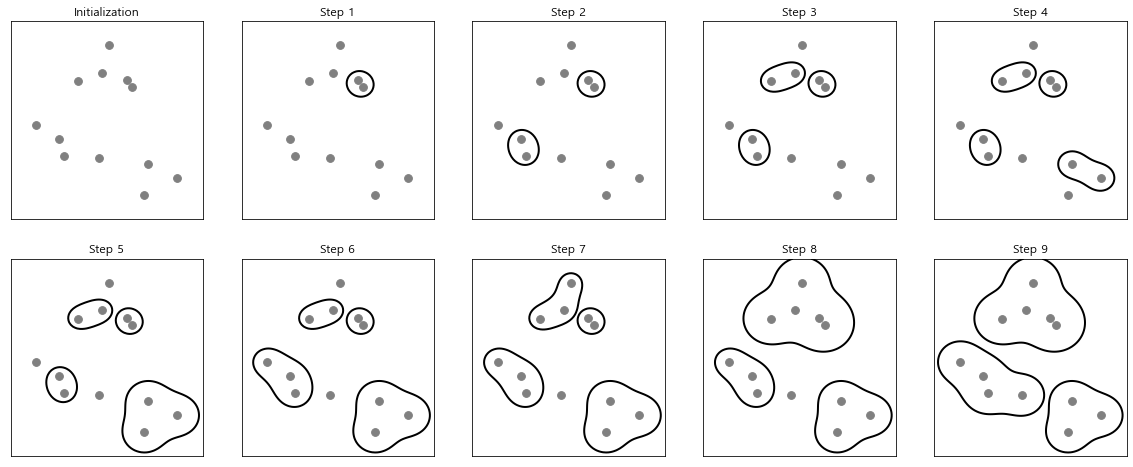

In [94]:
mglearn.plots.plot_agglomerative_algorithm()

+ 단계가 계속되다가 가까운 두 클러스터가 합쳐지다가 세 개의 클러스터만 남게 되면 종료(세 개의 클러스터를 찾는다고 지정했으므로)
+ 알고리즘의 작동 특성상 병합 군집은 새로운 데이터 포인트에 대해서는 예측을 할 수 없음
+ 따라서 병합 군집은 predict 메서드가 없으나 훈련 세트로 모델을 만들고 소속 정보를 얻기 위한 fit_predict 메서드를 사용

+ 다음 코드는 fit_predict 메서드 사용의 예시

Text(0, 0.5, '특성 1')

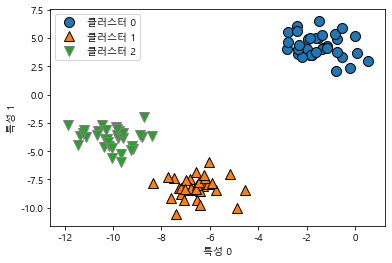

In [95]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")

##### 계측적 군집과 덴드로그램
+ 군집이 반복하여 진행되면 모든 포인트는 하나의 포인트를 가진 클러스터에서 시작하여 마지막 클러스터까지 이동하게 됨
+ 각 중간 단계는 데이터에 대한 (각기 다른 개수의) 클러스터를 생성하는데 이는 가능한 모든 클러스터를 연결해보는 데 도움이 됨
+ 이와 같이 병합군집은 '계층적 군집'을 만듦  
    
    
+ 밑에 그림은 In71그림에 나타난 모든 클러스터를 겹쳐서 표시한 것임. 이 그림은 각 클러스터가 더 작은 클러스터로 어떻게 나뉘는지 잘 보여줌

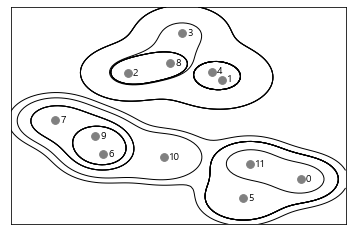

In [96]:
mglearn.plots.plot_agglomerative()

+ 계층 군집을 시각화하는 또 다른 도구인 '덴드로그램'은 다차원 데이터셋을 처리할 수 있음
+ scikit-learn은 덴드로그램을 그리는 기능을 제공하지 않으나 SciPy는 제공함
+ SciPy는 데이터 배열 X를 받아 계층 군집의 유사도가 들어있는 연결 배열을 반환하는 함수를 제공하고 이
+ 연결 배열을 SciPy의 dendrogram함수에 넣어 덴드로그램 그래프를 그릴 수 있음

Text(0, 0.5, '클러스터 거리')

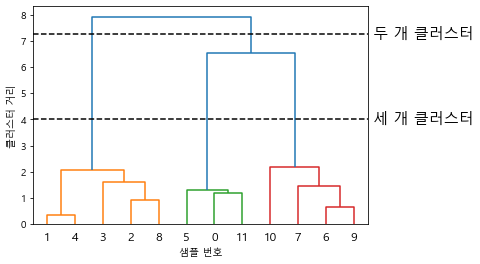

In [97]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X 에 ward 함수를 적용합니다
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴합니다
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)
# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

+ 덴드로그램에서 데이터 포인트는 맨 아래 나타남
+ 이 포인트들을 잎으로 하는 트리가 만들어지며 새로운 부모 노드는 두 클러스터가 합쳐질 때 추가됨
+ 덴드로그램의 y축이 단순히 병합 알고리즘에서 두 클러스터가 합쳐질 때를 나타내는 것만은 아니고 가지의 길이는 합쳐진 클러스터가 얼마나 멀리 떨어져 있는지 보여줌  
  
      
+ 병합 군집은 two_moons 데이터셋과 같은 복잡한 형상을 구분하지 못함

### 3.5.3 DBSCAN
+ DBSCAN(밀도기반 군집분석) 의 특징
  + 클러스터의 개수를 미리 지정할 필요가 없다.
  + 복잡한 형상을 찾을 수 있고 어떤 클래스에도 속하지 않는 포인트를 구분 가능하다.
  + 다른 알고리즘보다는 느리지만 비교적 큰 데이터셋에도 적용 가능하다.
+ 알고리즘 적용 과정
  + 밀집 지역 : 특성 공간에서 데이터가 많이 붐비는 지역
  + 핵심 샘플 : 밀집 지역의 포인트
  + DBSCAN에는 min_samples와 eps라는 두 개의 매개변수가 있다.
  + 한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 개수만큼 들어있으면 핵심 샘플로 분류하고 클러스터로 합쳐진다.
  + 만약 eps 거리 안에 있는 포인트 수가 min_samples보다 적을 시 잡음으로 레이블한다.
    + 포인트 종류
    + 핵심 포인트
    + 경계 포인트(핵심 포인트에서 eps 거리 안에 있는 포인트)
    + 잡음 포인트

In [98]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n", clusters)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


+ 작은 샘플 데이터셋에 적합하지 않은 eps와 min_samples 기본값으로 인해 모든 포인트에 잡음 포인트가
할당됨.

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


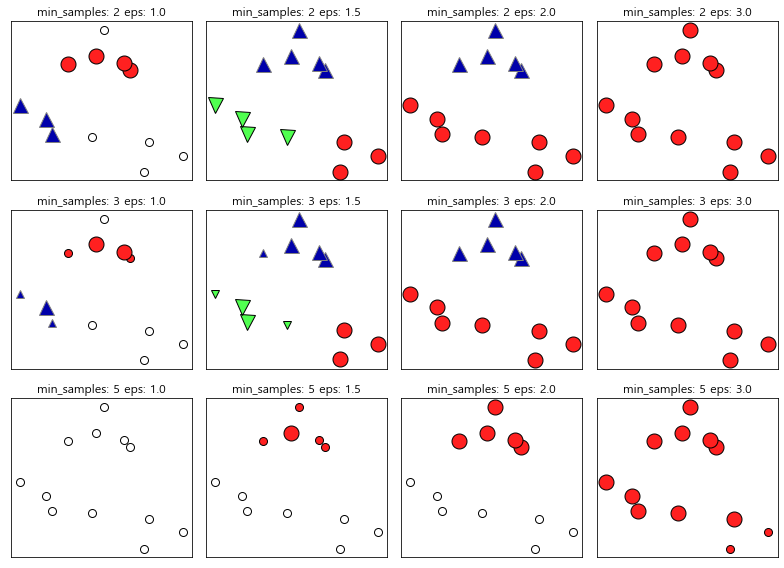

In [99]:
mglearn.plots.plot_dbscan()

+ eps를 증가시키면 하나의 클러스터에 더 많은 포인트가 포함된다.
+ min_samples를 키우면 핵심 포인트 수가 줄어들며 잡음 포인트가 늘어난다.
+ eps는 간접적으로 몇 개의 클러스터가 만들어질지 제어한다.
  + StandardScaler나 MinMaxScaler로 적절한 eps 값을 쉽게 찾을 수 있다.

Text(0, 0.5, '특성 1')

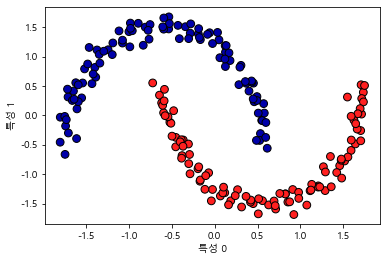

In [101]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

+ eps를 너무 낮게 내리면 너무 많은 클러스터를 만들어내고 높게 올리면 클러스터를 하나만 만들게 된다.

### 3.5.4 군집 알고리즘의 비교와 평가
+ 군집 알고리즘을 적용하는 데 어려운 점은 알고리즘이 잘 작동하는지 평가하거나 여러 알고리즘의 출력을 비교하기가 매우 어렵다는 점이다.

##### 타깃값으로 군집 평가하기
+ 1(최적일 때)과 0(무작위로 분류될 때) 사이의 값을 제공하는 ARI와 NMI -> 실제 정답 클러스터와 비교하여 평가할 수 있는 지표

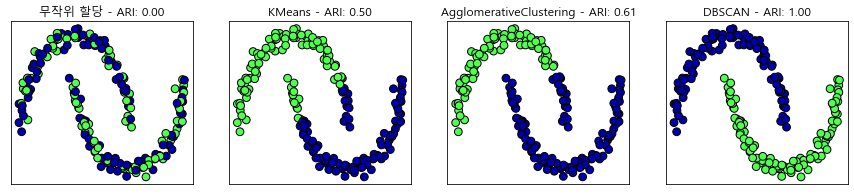

In [102]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
subplot_kw={'xticks': (), 'yticks': ()})
# 사용할 알고리즘 모델을 리스트로 만듭니다
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
DBSCAN()]
# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(
adjusted_rand_score(y, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
# 클러스터 할당과 클러스터 중심을 그립니다
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
    cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
    adjusted_rand_score(y, clusters)))

- 군집 모델을 평가할 때 주의할 점
+ adjust_rand_score나 normalized_mutual_info_score 같은 군집용 측정 도구가 아닌 accuracy_score 사용하는 것. 정확도를 사용하면 할당된 클러스터의 레이블 이름이 실제 레이블 이름과 맞는지 확인
하기 때문이다.

In [103]:
from sklearn.metrics import accuracy_score
# 포인트가 클러스터로 나뉜 두 가지 경우
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# 모든 레이블이 달라졌으므로 정확도는 0입니다
print("정확도: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# 같은 포인트가 클러스터에 모였으므로 ARI는 1입니다
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

정확도: 0.00
ARI: 1.00


+ 타깃값 없이 군집 평가하기
  + ARI의 문제점 : 보통은 타깃값이 존재하지 않기 때문에 애플리케이션의 성능 평가에서는 유용하지 않음.
  + 실루엣 계수  
    타깃값이 필요 없는 군집용 지표로 클러스터의 밀집 정도를 계산한다.  
    높을수록 좋으며 최대 점수는 1이다.

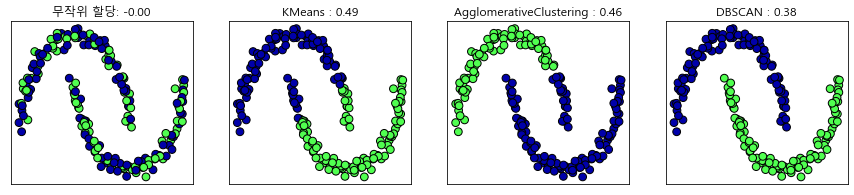

In [104]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
subplot_kw={'xticks': (), 'yticks': ()})
# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# 무작위 할당한 클러스터를 그립니다
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당: {:.2f}".format(
silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
# 클러스터 할당과 클러스터 중심을 그립니다
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
    s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
    silhouette_score(X_scaled, clusters)))

+ 클러스터 평가에 적합한 전략은 데이터에 잡음 포인트를 추가하거나 여러 가지 매개변수를 설정으로 알고리즘을 실행하고 결과를 비교하는 견고성 기반의 지표이다.
+ 클러스터가 우리 기대에 부합하는지 알 수 있는 유일한 방법은 클러스터를 직접 확인하는 것이다

##### 얼굴 데이터셋으로 군집 알고리즘 비교
+ LFW 데이터셋에 k-평균, DBSCAN, 병합 군집 알고리즘 적용

In [105]:
# LFW 데이터에서 고유얼굴을 찾은 다음 데이터를 변환합니다
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

##### DBSCAN으로 얼굴 데이터셋 분석하기

In [106]:
# 기본 매개변수로 DBSCAN을 적용합니다
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1]


+ 레이블이 -1뿐이므로 모든 데이터가 잡음 포인트로 레이블 됨. -> eps값을 크게 하여 각 포인트의 이웃을 늘리거나 min_samples 값을 낮추어 클러스터에 모을 포인트 수를 줄여 해결

In [107]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1]


클러스터의 최소 포인트를 3으로 줄여도 모드 잡음 포인트로 레이블 되었으므로 eps를 키움.m

In [109]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1  0]


In [110]:
# 잡음 포인트와 클러스터에 속한 포인트 수를 셉니다.
# bincount는 음수를 받을 수 없어서 labels에 1을 더했습니다.
# 반환값의 첫 번째 원소는 잡음 포인트의 수입니다.
print("클러스터별 포인트 수:", np.bincount(labels + 1))

클러스터별 포인트 수: [  32 2031]


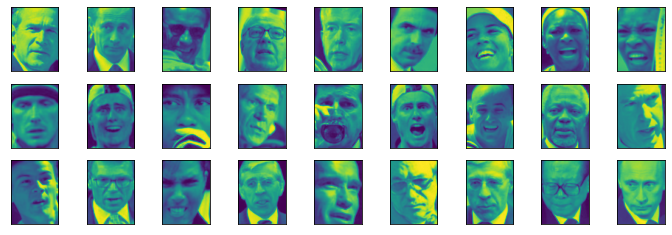

In [111]:
noise = X_people[labels==-1]
fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

+ 얼굴이 가려져 있거나, 얼굴 각도가 다른 이미지는 잡음으로 레이블 됨.
+ 특이한 것을 찾아내는 이런 종류의 분석을 이상치 검출 이라고 함.
+ 실제 애플리케이션이라면 이미지 여백을 잘라 일정한 데이터셋을 만드는 것이 좋다.

In [112]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps=", eps)
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("클러스터 수:", len(np.unique(labels)))
    print("클러스터 크기:", np.bincount(labels + 1))


eps= 1
클러스터 수: 1
클러스터 크기: [2063]

eps= 3
클러스터 수: 1
클러스터 크기: [2063]

eps= 5
클러스터 수: 1
클러스터 크기: [2063]

eps= 7
클러스터 수: 14
클러스터 크기: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps= 9
클러스터 수: 4
클러스터 크기: [1307  750    3    3]

eps= 11
클러스터 수: 2
클러스터 크기: [ 413 1650]

eps= 13
클러스터 수: 2
클러스터 크기: [ 120 1943]


+ eps가 작으면 모든 포인트가 잡음으로 레이블 됨.
+ eps가 크면 큰 클러스터 하나와 잡음 포인트가 만들어짐.

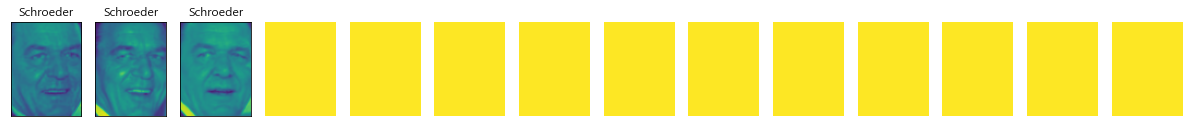

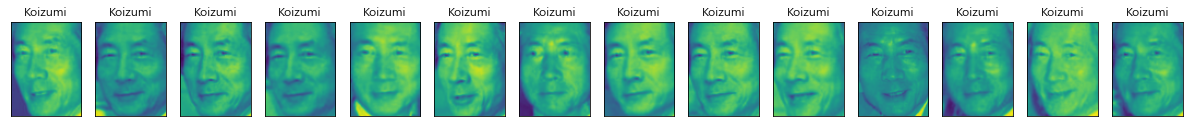

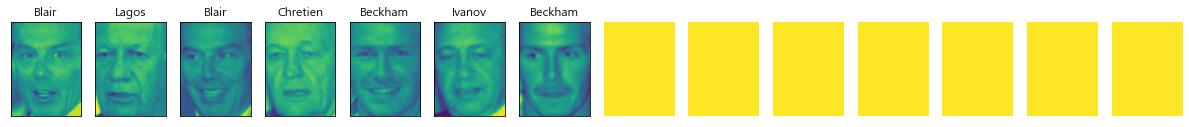

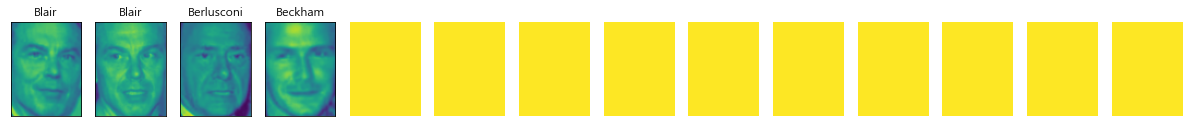

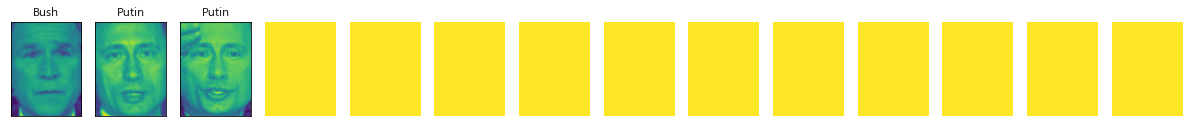

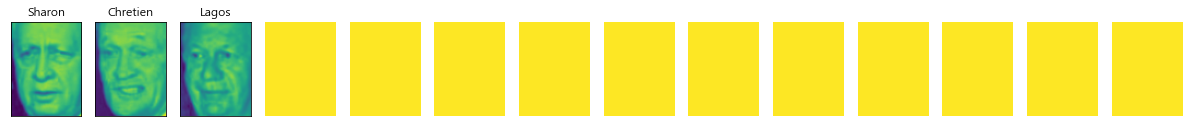

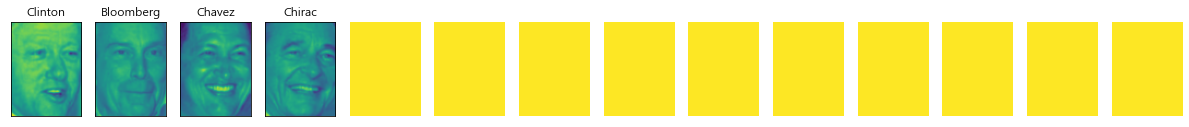

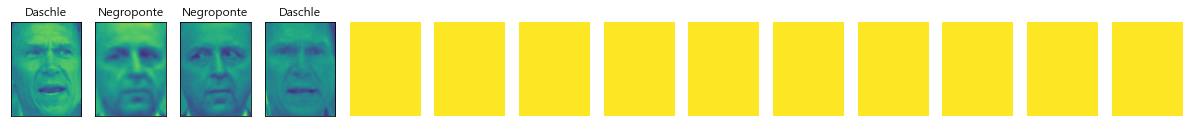

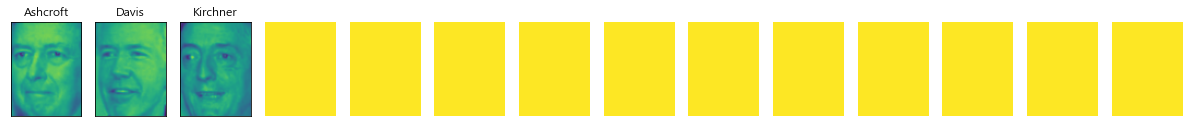

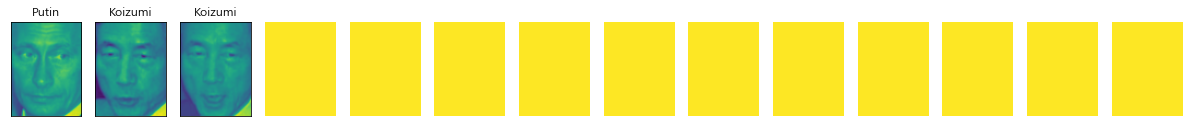

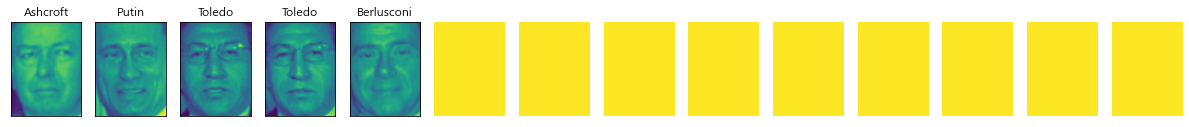

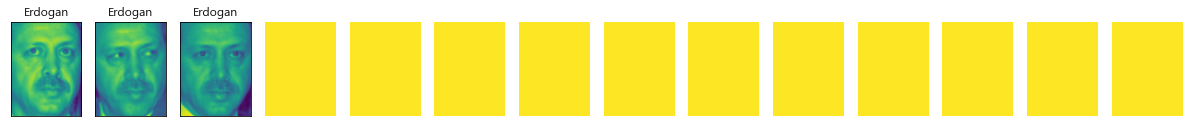

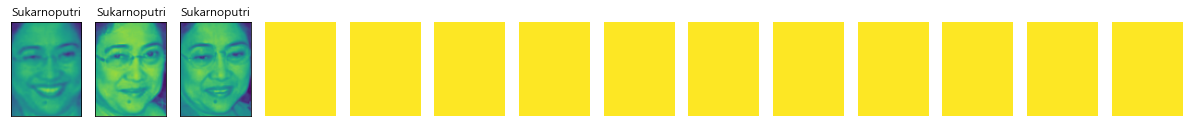

In [115]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)
for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, 14, figsize=(14*1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        i += 1
    for j in range(len(axes) - i):
        axes[j+i].imshow(np.array([[1]*65]*87), vmin=0, vmax=1)
        axes[j+i].axis('off')

+ 작은 클러스터가 많이 만들어진 eps=7의 결과를 시각화한 것이다.

In [116]:
n_clusters = 10
# k-평균으로 클러스터를 추출합니다
km = KMeans(n_clusters=n_clusters, random_state=0)
labels_km = km.fit_predict(X_pca)
print("k-평균의 클러스터 크기:", np.bincount(labels_km))

k-평균의 클러스터 크기: [282 226 105 268 151 324 202 208 208  89]


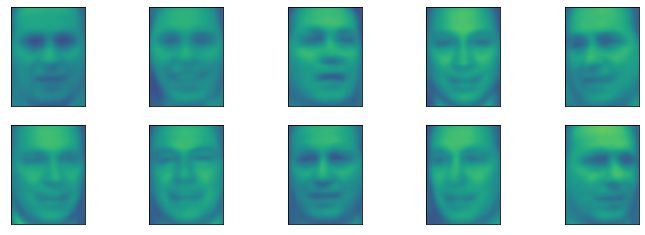

In [118]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
vmin=0, vmax=1)

+ 차원이 감소된 PCA 성분이 이미지를 더 부드럽게 만듦.

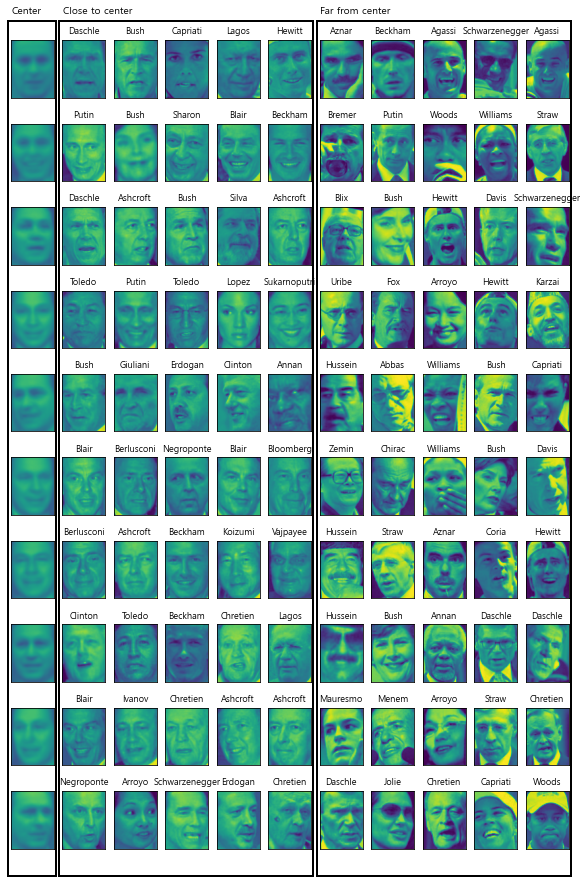

In [119]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
y_people, people.target_names)

+ 중심에서 먼 포인트들은 특별한 규칙이 없어 보임 -> k-평균이 DBSCAN처럼 잡음 포인트 개념이 없이 모든 포인트를 구분하기 때문이다.
+ 클러스터 수를 늘리면 알고리즘이 미세한 차이를 더 찾아낼 수 있음

##### 병합 군집으로 얼굴 데이터셋 분석하기

In [120]:
# 병합 군집으로 클러스터를 추출합니다
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기:",
np.bincount(labels_agg))

병합 군집의 클러스터 크기: [169 660 144 329 217  85  18 261  31 149]


In [121]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.10


+ ARI 점수를 이용해 병합 군집과 k-평균으로 만든 두 데이터를 비교해 봤을 때, ARI 값이 0.09로 공통 부분
이 거의 없음을 확인할 수 있다.

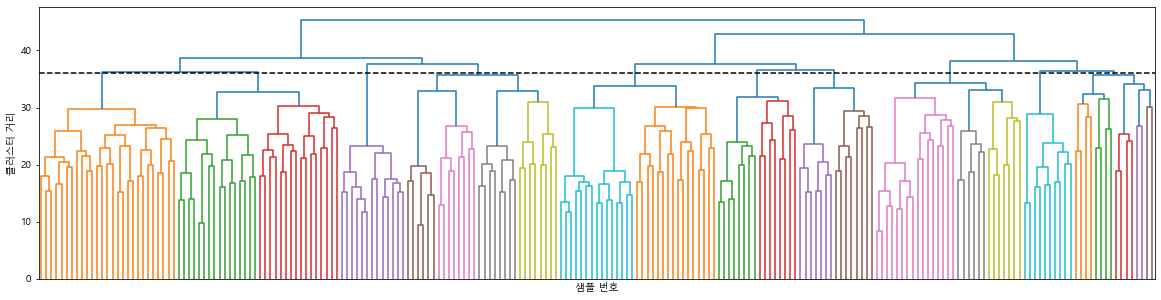

In [122]:
linkage_array = ward(X_pca)
# 클러스터 사이의 거리가 담겨있는 linkage_array로 덴드로그램을 그립니다
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [36, 36], '--', c='k')

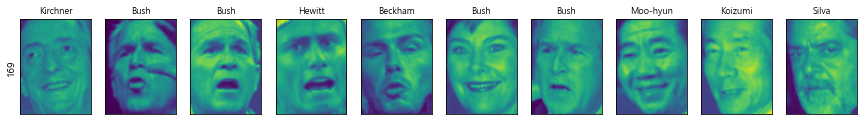

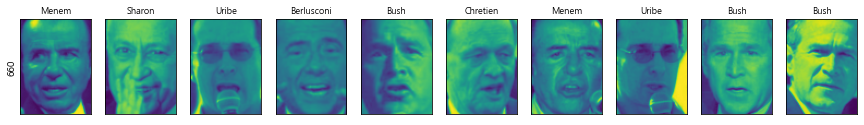

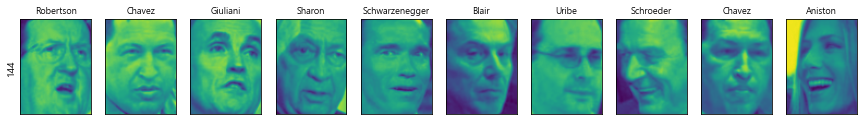

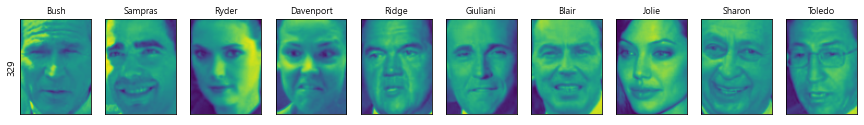

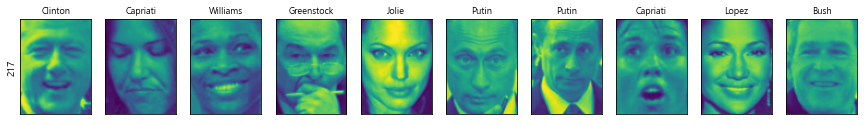

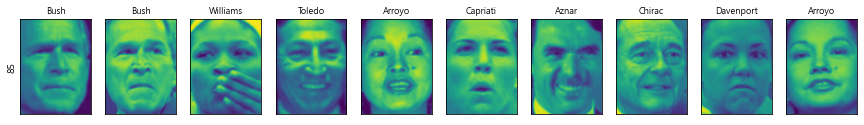

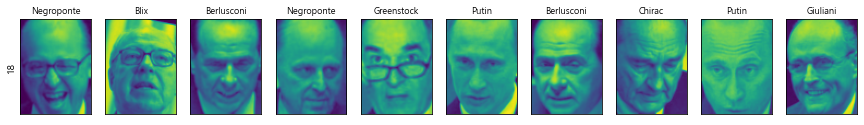

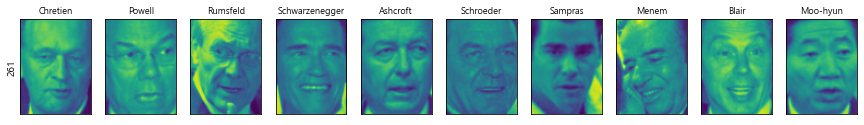

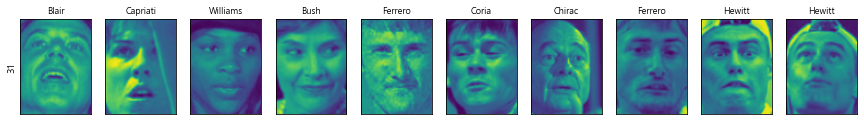

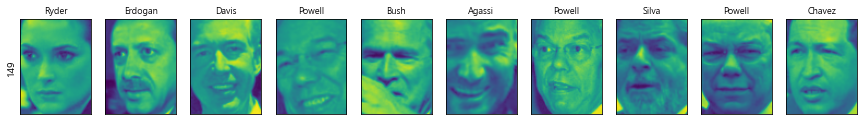

In [124]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
        labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
fontdict={'fontsize': 9})

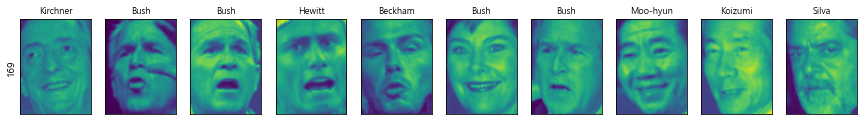

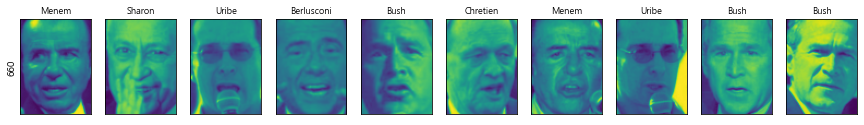

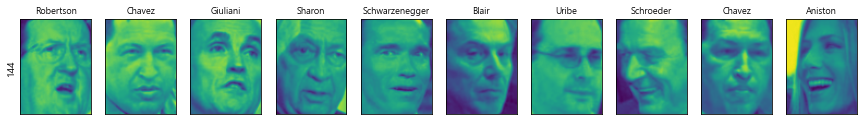

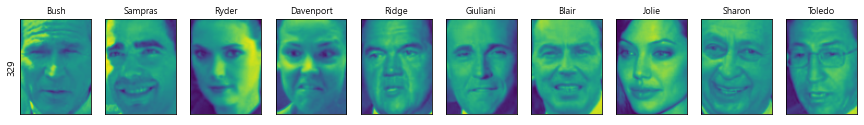

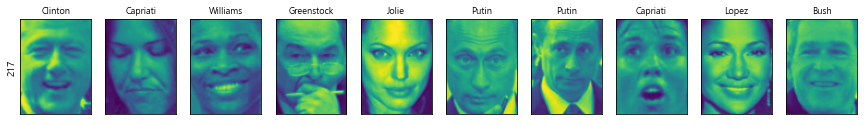

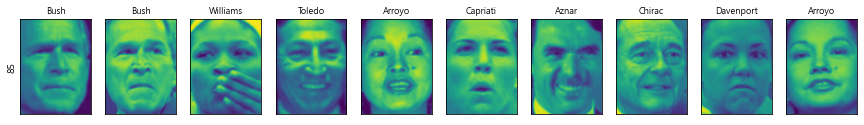

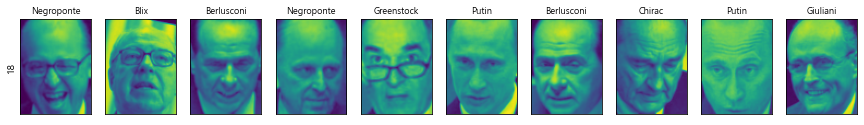

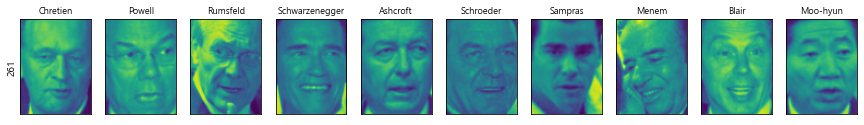

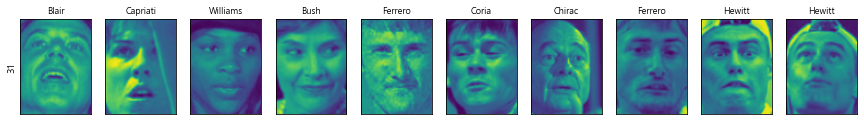

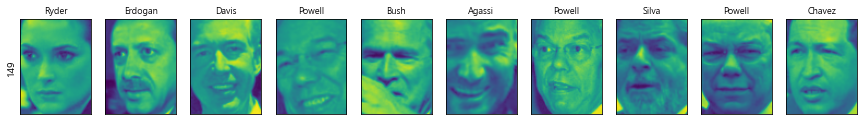

In [125]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
    figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
    labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
        fontdict={'fontsize': 9})

+ 일관성을 가지기에 클러스터가 너무 크기 때문에 클러스터 수를 40개로 늘림

병합 군집의 클러스터 크기: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


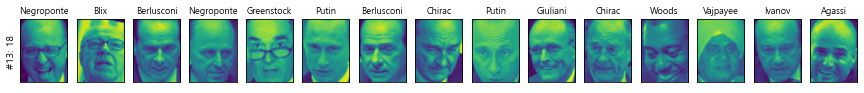

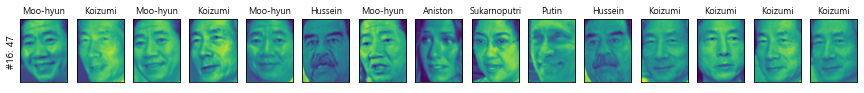

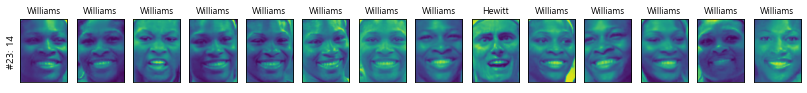

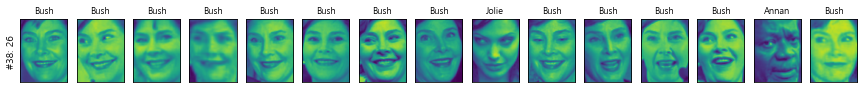

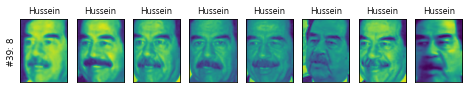

In [126]:
# 병합 군집으로 클러스터를 추출합니다
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기:", np.bincount(labels_agg))
n_clusters = 40
for cluster in [13, 16, 23, 38, 39]: # 흥미로운 클러스터 몇개를 골랐습니다
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
    figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
        labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
        fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

### 3.5.5 군집 알고리즘 요약
+ k-평균
  + 1. 원하는 클러스터 개수를 지정할 수 있다.
  + 2. 클러스터 중심을 사용해 클러스터를 구분하고 각 데이터 포인트를 클러스터의 중심으로 대표할 수 있기 때문에 분해방법으로 볼 수 있다.
+ DBSAN
  + 1. eps 매개변수를 사용하여 클러스터 크기를 간접적으로 조절할 수 있다.
  + 2. 클러스터에 할당되지 않는 잡음 포인트를 인식할 수 있으며 클러스터의 개수를 자동으로 결정한다.
  + 3. 복잡한 클러스터의 모양을 인식할 수 있다.
+ 병합 군집
  + 1. 원하는 클러스터 개수를 지정할 수 있다.
  + 2. 전체 데이터의 분할 계층도를 만들어주며 덴드로그램을 사용해 손쉽게 확인할 수 있다